## 이미지 검출

- 영상 내에서 주요한 특징점을 검출하는 방법
- 특징적이 존재하는 위치를 알려주거나 해당 특징점을 부각

### 01. 가장자리 검출


가장자리 
- 전경과 배경이 구분되는 지점
- 전경과 배경 사이에서 밝기가 큰 폭으로 변하는 지점 :: 객체의 가장자리
- 1차 미분 형태 :: 극댓값 or 극소값
- 2차 미분 형태 :: 제로 크로싱


---
> Q1. 미분 형태의 가장자리 유형은 어떤 것들이 있나요? 가장자리를 검출하는 방식에는 어떤 것들이 있는지 말해주세요.

가장자리 유형
- Step Edge
- Line Edge
- Ramp Edge
- Roof Edge

가장자리 검출방식
- 픽셀의 밝기에 따른 미분을 진행 (노이즈가 심할 경우 최소화한 후 진행)
---

#### 소벨미분
- 미분값을 구할 때 가장 많이 사용되는 연산자
- 커널을 사용해 미분하며, 커널의 크기는 홀수 값을 갖는다.
- 커널 내부의 원소의 합은 0이 되어야 한다.

#### 샤르필터
- 소벨 미분의 단점을 보완한 방식
- 소벨 연산자의 경우 커널의 크기가 작으면 정확도가 떨어지는데, 이를 해결하기 위한 방식
- (3X3) 소벨필터의 경우 기울기의 각도가 수평이나 수직에서 멀이질수록 정확도가 떨어진다.

---

> Q2. 소벨 미분과 샤르 필터의 차이점은 무엇인가요?

- 샤르필터는 소벨필터보다 더 빠르고 정확하다. 따라서, 3X3 필터를 사용한다면 샤르 필터를 활용한다.
- 샤르필터는 소벨 연산 함수와 매개변수의 의미와 활용방식이 동일하며, 차이점은 샤르 필터는 3X3 크기만 지원해서 커널의 크기는 사용하지 않는다는 것이다.
---

#### 라플라시안

- 2차 미분의 형태
- x축과 y축을 따라 2차 미분한 합을 의미함
- 가장자리가 밝은 부분에서 발생한 것인지 어두운 고셍서 발생한 것인지 알 수 있음

#### 캐니엣지

- x와 y에 대해 1차 미분을 계산한 다음, 네 방향으로 미분
- 미분한 결과로 극댓값을 갖는 지점들이 가장자리가 됨
- 성능이 월등히 좋으며 노이즈에 민감하지 않아 강한 가장자리를 검출하는데 목적을 둔 알고리즘
- 히스테리시스 임곗값을 적용해 윤곽선을 생성

---
> Q4. 캐니 엣지 알고리즘은 어떻게 동작합니까? 순서대로 적어보세요.

1. 노이즈 제거를 위해 가우시안 필터를 사용해 흐림필터를 적용
2. 기울기 값이 높은 지점을 검출 (소벨 마스크 적용)
3. 최댓값이 아닌 픽셀의 값을 0으로 변경 (명백하게 가장자리가 아닌 값을 제거)
4. 히스테리시스 임계값 적용

> Q5. 이미지를 하나 불러와, 예제 7.2(python opencv에서의 캐니 엣지)를 수행하고 결과를 확인해보세요.

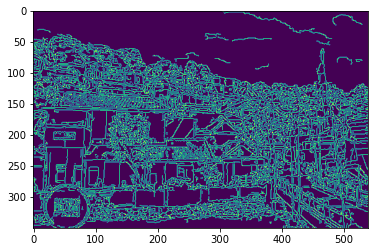

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


image_path = os.getenv('HOME') + '/Downloads/colorful.jpg'
src = cv2.imread(image_path)
dst = cv2.Canny(src, 100, 200, apertureSize=3, L2gradient=True)

plt.imshow(dst)

---

### 02. 윤곽선 검출

윤곽선 검출 알고리즘
- 전처리가 진행된 이미지에서 **가장자리로 검출된 픽셀을 대상으로 세그멘테이션 작업을 진행**
- 검출된 윤곽선은 형상의 분석과 물체 감지 및 인식에 가장 효과적인 방법 중 하나

윤곽선 검출 과정
- 1. 노이즈제거
- 2. 윤곽선 검색방법과 근사방법을 선택
    - 모든 윤곽선에 대한 윤곽점을 반환하거나
    - 검출된 윤곽점 요소를 압축해서 강도가 높은 윤곽점만 반환
- 3. 계층 구조의 형태

---
#### 계층 구조
> Q6. 계층 구조는 기본적으로 어떤 형태를 띱니까? 계층 구조의 내용을 정리하여 설명해주세요.

- 루트노드: 트리에서 최상위 노드
- 부모노드와 자식노드: 상대적으로 위 아래에 존재하는 노드
- 잎노드: 자식노드가 없는 노드
- 내부노드: 잎 노드가 아닌 다른 모든 노드

---

#### 윤곽선 검출
중요 매개변수
- 검색방법 :: 윤곽선을 검출해 어떤 계층 구조의 형태를 사용할지 설정
- 근사방법 :: 윤곽점의 표시 방법을 설정
을 선택하는 것

---

> Q7. python opencv의 윤곽선 검출 함수에 대해 적어보고, 각각의 요소가 무슨 역할을 하는지 설명해주세요.

윤곽선 검출 함수


In [ ]:
contours, hierarchy = cv2.findContours(
    image,
    mode,
    method,
    offset = None
)

contours :: 검출된 윤곽선 <br/>
hierarchy :: 계층 구조 <br/>
mode :: 검색방법 => 윤곽선을 검출해 어떤 계층 구조의 형태를 사용할지 설정 <br/>
method :: 검출된 윤곽선 => 윤곽점의 표시 방법을 설정 <br/>
offset :: 오프셋 => 반환된 윤곽점들의 좌푯값에 이동할 값을 설정

> Q8. 표 7.1을 참고하여, 검색 방법에는 어떤 것들이 있는지 알려주세요.

**검색방법**

|속성|설명|
|:---:|:---:|
|cv2.RETR_EXTERNAL|최외곽 윤곽선만 검색|
|cv2.RETR_LIST|모든 윤곽선을 검출하며, 계층구조를 형성하지 않음|
|cv2.RETR_CCOMP|모든 윤곽선을 검색해서 2단계 계층 구조로 구성|
|cv2.RETR_TREE|모든 윤곽선을 검출하고 트리구조로 구성|

> Q9. 표 7.2를 참고하여, 근사 방법에는 어떤 것들이 있는지 알려주세요.

**근사방법**

|속성|설명|
|:---:|:---:|
|cv2.CHAIN_APPROX_NONE|검출된 모든 윤곽점을 반환|
|cv2.CHAIN_APPROX_SIMPLE|수평, 수직, 대각선 부분을 압축해서 끝점만 반환|
|cv2.CHAIN_APPROX_TC89_L1|Teh-Chain 체인 근사 알고리즘을 적용|
|cv2.CHAIN_APPROX_TC89_KCOS|Teh-Chain 체인 근사 알고리즘을 적용|

<br/>
<br/>

#### 윤곽선 그리기

> Q10. 예제 7.4(python opencv에서의 윤곽선 검출)를 수행해보세요.

0 [ 1 -1 -1 -1]
1 [ 2  0 -1 -1]
2 [ 3  1 -1 -1]
3 [ 4  2 -1 -1]
4 [ 5  3 -1 -1]
5 [ 6  4 -1 -1]
6 [ 7  5 -1 -1]
7 [ 8  6 -1 -1]
8 [ 9  7 -1 -1]
9 [10  8 -1 -1]
10 [11  9 -1 -1]
11 [12 10 -1 -1]
12 [13 11 -1 -1]
13 [-1 12 -1 -1]


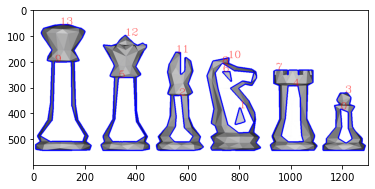

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = os.getenv('HOME') + '/Downloads/chess.png'
src = cv2.imread(image_path)
dst = src.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
image = cv2.bitwise_not(morp)

contours, hierarchy = cv2.findContours(
    image,
    cv2.RETR_LIST,
    cv2.CHAIN_APPROX_NONE,
    offset = None
)

cv2.drawContours(dst, contours, -1, (0, 0, 255), 3)
for i in range(len(contours)):
    cv2.putText(dst, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 1.3, (255, 0, 0), 1)
    print(i, hierarchy[0][i])
    
plt.imshow(dst) 

---
## 03. 다각형 근사

- 검출된 윤곽선의 형상을 분석할 때 정점의 수가 적은 다각형으로 표현하도록 다각형 곡선을 근사하는 방법
- 윤곽선 검출 함수에서 반환된 윤곽선 정보를 활용해 윤곽점의 개수를 축소

---
> Q11. 왜 정점의 수가 적은 것이 중요한가요? 아래의 그림을 보고 그 의미를 추측해봅시다.
![image](https://user-images.githubusercontent.com/70703320/116718520-02074c80-aa15-11eb-8d65-bcf987f61d16.png)

정점의 수가 적더라도 윤각의 정보를 충분히 담을 수 있기 때문?!

다각형 근사는 더글라스-피커 알고리즘을 이용!


> Q12. 예제 7.6(python opencv에서의 다각형 근사)를 수행해보세요.


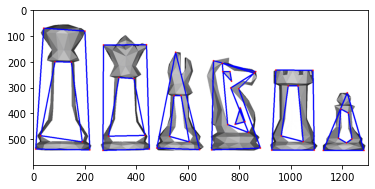

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = os.getenv('HOME') + '/Downloads/chess.png'
src = cv2.imread(image_path)
dst = src.copy()

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 230, 255, cv2.THRESH_BINARY)
morp = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=2)
image = cv2.bitwise_not(morp)

contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for i in contours:
    perimeter = cv2.arcLength(i, True)
    epsilon = perimeter * 0.05
    approx = cv2.approxPolyDP(i, epsilon, True)
    cv2.drawContours(dst, [approx], 0, (0, 0, 255), 3)
    for j in approx:
        cv2.circle(dst, tuple(j[0]), 3, (255, 0, 0), -1)
    
plt.imshow(dst)

#### 윤곽선 정보
1. 윤곽선 길이 계산
2. 윤곽선 면적 계산
3. 윤곽선 경계 사각형
4. 윤곽선의 최소 면적 사각형
5. 윤곽선의 최소 면적 원
6. 윤곽선의 타원 피팅
7. 윤곽선의 볼록 껍질
8. 윤곽선의 볼록성 시험
9. 윤곽선의 모멘트


---

> Q12. 위의 윤곽선 정보 요소들을 차분히 읽고, 홀수/짝수 번호를 선택하여 해당 번호의 정보들에 대해 설명해주세요.

2. 윤곽선 면적 계산 :: 윤곽선 내부의 면적을 계산

In [ ]:
area = cv2.contourArea(contour, oriented)

4. 윤곽선의 최소 면적 사각형 :: 윤곽선의 경계면을 둘러싸는 최소 크기의 사각형을 구함

In [ ]:
rect = cv2.minAreaRect(points)

6. 윤곽선의 타원 피팅 :: 윤곽선의 집합에 대해 가장 근사한 타원을 구함

In [ ]:
ellipse = cv2.fitEllipse(points)

8. 윤곽선의 볼록성 시험 :: 윤곽선의 형태가 볼록한 형태를 지니고 있는지 확인

In [ ]:
convex = cv2.isContourConvex(contour)

> Q13. 스크랜스키 알고리즘이란 무엇인가요? 위의 윤곽선 관련 함수 중 특히 어디에 쓰이나요?

- 윤곽점에서 경계 사각형의 정점을 검출하여 볼록점으로 사용

---


### 04. 코너검출

이미지 상에서 코너점을 검출하는 알고리즘
- 코너란 트래킹하기 좋은 지점(트래킹이란 객체의 움직임을 추적하거나 관찰하는 것)

코너점을 코너 강도를 계산하여 검출해볼 수도 있다.

`코너 검출 알고리즘`은 높은 도함수를 갖는 지점을 계산해서,(가장 두드러지는 코너점) 코너의 정의에 만족하는 지점을 반환한다.


---

> Q14.python opencv의 코너 검출 함수를 적어보세요.

In [ ]:
cv2.cornerSubPix(
    image,
    corners,
    winSize,
    zeroZone,
    criteria
)

> Q15. 해리스 코너 검출기 알고리즘은 무엇인가요? 내용을 찾아보고, 요약하여 적어주세요.

![image](https://user-images.githubusercontent.com/70703320/116722800-d20e7800-aa19-11eb-966d-772eeee0a14c.png)

코너는 모든 방향에서 intensity 변화가 있는 경우를 의미한다고 볼 때 intensity의 차이를 계산하는 알고리즘

`해리스 측정 계수(k)` :: 해리스 알고리즘을 사용할 때 할당(해리스 대각합의 감도 계수)

> 예제 7.8(python opencv에서의 코너 검출 및 코너 픽셀 세밀화)를 수행해보세요. (사람 형태의 이미지를 권장합니다.)

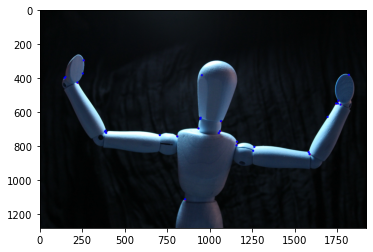

In [4]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = os.getenv('HOME') + '/Downloads/dummy.jpg'
src = cv2.imread(image_path)
dst = src.copy()

gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 5, blockSize=3, useHarrisDetector=True, k=0.03)

for i in corners:
    cv2.circle(dst, tuple(i[0]), 3, (255, 0, 0), 5)

criteria = (cv2.TERM_CRITERIA_MAX_ITER + cv2.TERM_CRITERIA_EPS, 30, 0.001)
cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

for i in corners:
    cv2.circle(dst, tuple(i[0]), 3, (0, 0, 255), 5)

plt.imshow(dst)

### 05. 직선검출

- 이미지에서 선형적인 부분을 검출하기 위해 사용
- 허프 변환(Hough Transform) 알고리즘을 활용해 직선을 검출

> Q17. 허프 변환 알고리즘에 대해 찾아보고, 내용을 요약해 보세요.

- 이미지에서 특성이 비슷한 모든 픽셀들에 대해 ($r, \theta$)의 값을 모두 카운팅하고 가장 많이 카운팅된 ($r, \theta$)가 이미지에서 직선일 확류링 높음일 이용하는 알고리즘

[잘 설명된 블로그](https://m.blog.naver.com/samsjang/220588392347)

> Q18. 위의 세 종류 허프 변환에 대해 짧게 설명해주세요.

1. 표준 허프 변환
    - 입력 이미지(x, y 평면) 내의 점 $p$를 지나는 직선의 방정식을 구함
    
    
2. 멀티 스케일 허프 변환
    - 검출한 직선의 값이 더 정확한 값으로 반환되도록, 거리(ρ)와 각도(θ)의 값을 조정해 사용
    
    
3. 점진성 확률적 허프 변환
    - 앞선 알고리즘을 최적화한 방식으로 모든 점을 대상으로 직선의 방정식을 세우는 것이 아닌, 임의의 점 일부만 누적해서 계산
    
[잘 설명된 블로그](https://076923.github.io/posts/Python-opencv-28/)

### 06. 원 검출

- 허프 변환 알고리즘 중 하나인 허프 원 변환 알고리즘을 활용해 원을 검출
- 허프 원 변환 알고리즘은 2차원이 아닌 3차원 누산 평면으로 검출

> Q20. python opencv의 허프 원 변환 함수는 어떻게 표현되는지 알려주세요.

In [ ]:
circles = cv2.HoughCircles(
    image,
    method,
    dp,
    minDist,
    param1 = None,
    param2 = None,
    minRadius = None,
    maxRadius = None
)

> Q21. 예제 7.12(python opencv에서의 허프 원 변환)을 수행하여 확인해보세요.(원이 많은 이미지를 사용해보세요.)

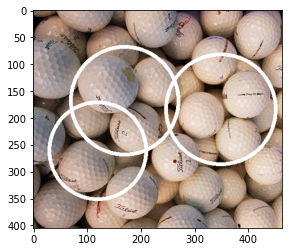

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

image_path = os.getenv('HOME') + '/Downloads/golf.jpg'
src = cv2.imread(image_path)
dst = src.copy()

image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=35, minRadius=80, maxRadius=120)

for i in circles[0]:
    cv2.circle(dst, (i[0], i[1]), int(i[2]), (255, 255, 255), 5)
    
plt.imshow(dst)